# Dataset
- California Housing Prices
    https://www.kaggle.com/datasets/camnugent/california-housing-prices
    
    ## Reference
    - Analysis California Housing Prices
      https://www.kaggle.com/code/ibrahimkhalid01/analysis-california-housing-prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing  import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
df = 'California_housing/housing.csv'
df = pd.read_csv(df)

# Exploratory Data

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

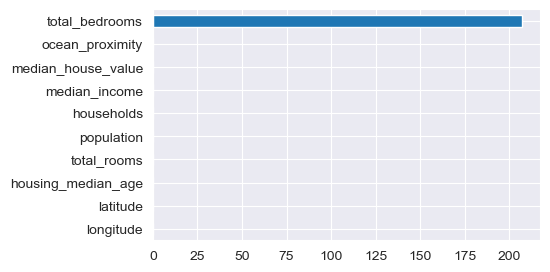

In [6]:
df.isna().sum().sort_values(ascending=True).plot(kind='barh',figsize=(5,3))
plt.savefig('California_housing/isna.png')

In [7]:
df.fillna(df['total_bedrooms'].median(),axis=0,inplace=True)

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
df.to_csv('housing_clean.csv', index=False)

# Data Visualization

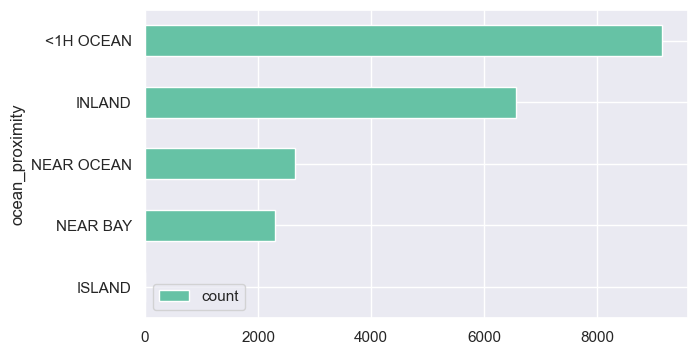

In [10]:
df.ocean_proximity.value_counts()
sns.set(palette='Set2')
df.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(7,4))
plt.savefig('California_housing/housing_place.png')
plt.legend()

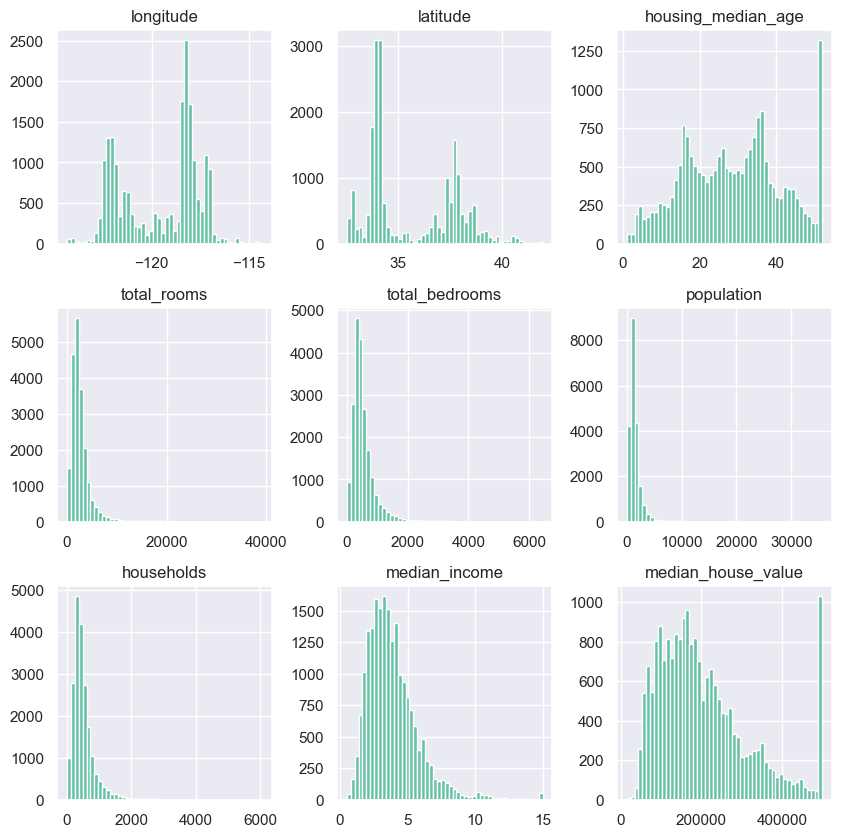

In [11]:
df.hist(bins=50,figsize=(10,10))#The bins parameter is used to custom the number of bins shown on the plots.
plt.savefig('California_housing/history.png')
plt.show()

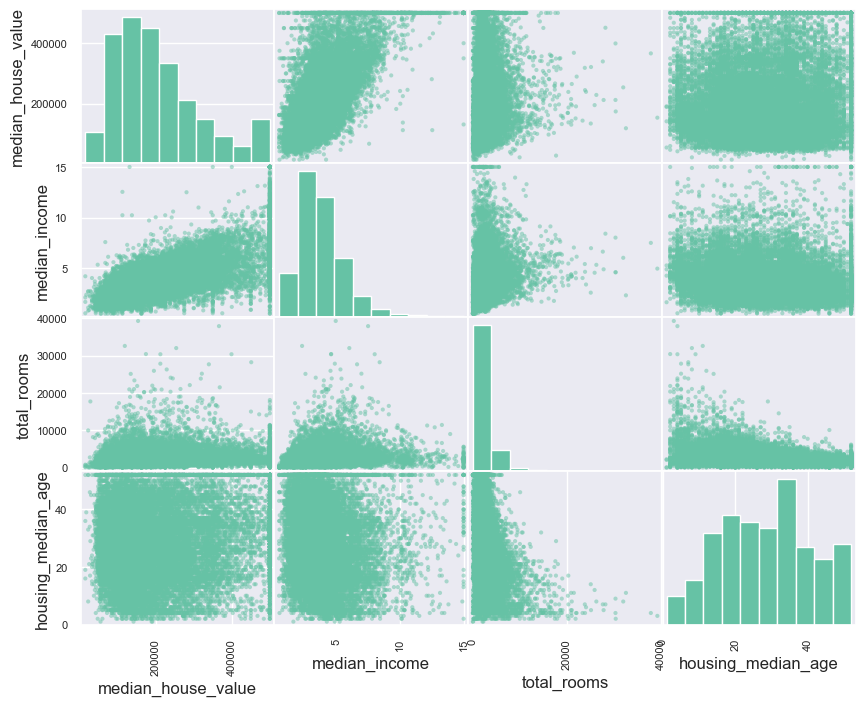

In [12]:
feat = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[feat],figsize=(10,8))
plt.savefig('California_housing/scatter_matrix.png')

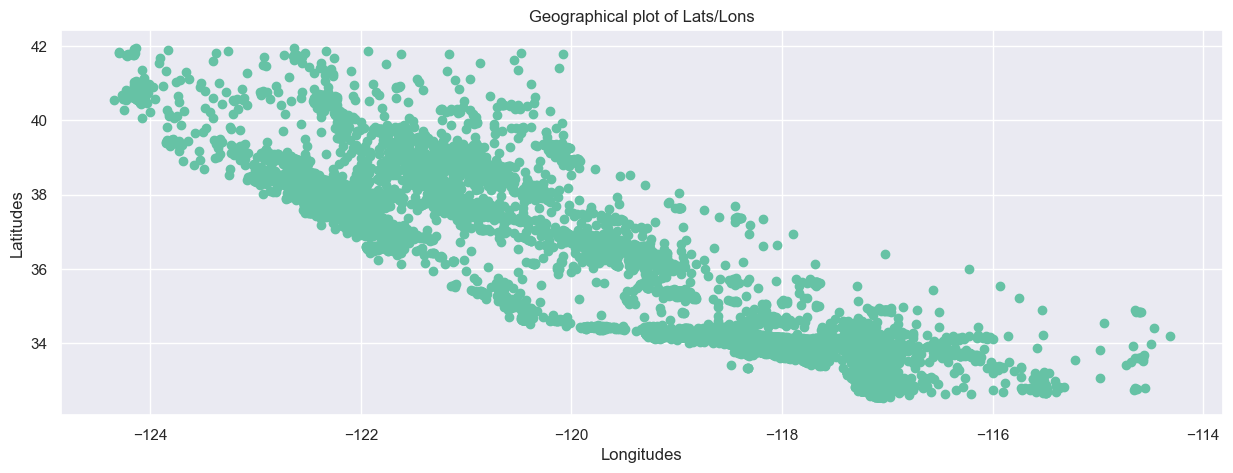

In [13]:
plt.figure(figsize=(15,5))#Figure size
plt.scatter('longitude','latitude',data=df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.savefig('California_housing/Geograph_coordinate.png')
plt.show()

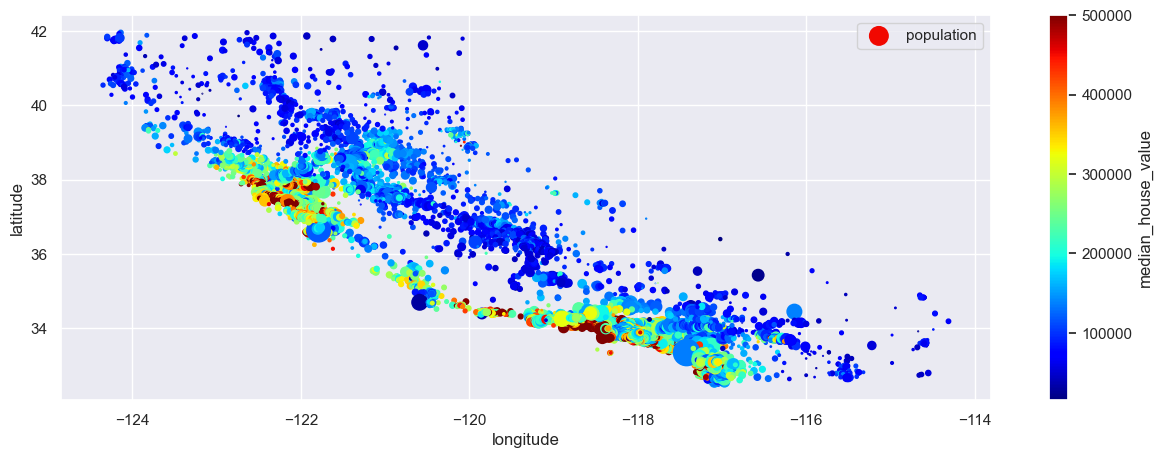

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude",
        s=df["population"]/100, label="population", figsize=(15,5),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.savefig('California_housing/heatmap of population.png')
plt.legend()

In [15]:
# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=500)

# Update the map style
fig.update_layout( mapbox_style="open-street-map")

#pio.write_image(fig, 'California_housing/heatmap_of_map.png')

# Show the plot
fig.show()

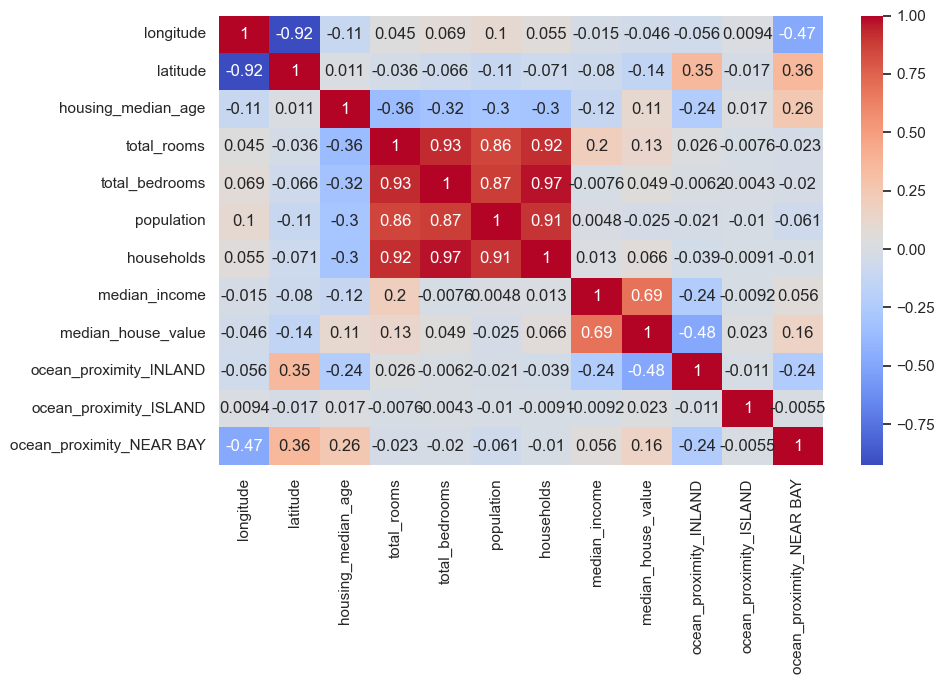

In [37]:
# Compute the correlation matrix
df2=df.iloc[:,:-1]
corr_matrix = df2.corr()
plt.figure(figsize=(10,7))
# Create a heatmap of the correlation matrix using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Adjust the layout to prevent cutoff
plt.tight_layout()

# Save the plot
plt.savefig('California_housing/heatmap of correlation.png')

# Show the plot
plt.show()

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Data Model

In [18]:
df = pd.get_dummies(df, columns = ["ocean_proximity"], drop_first = True)

In [19]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False

## Train Model

In [20]:
y = df[["median_house_value"]]
X = df.drop(["median_house_value"], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 10)

## Model 1 - Random Forest

In [22]:
# Build the model Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = forest_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_RFR=mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

# RMSE

RMSE_RFR=np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE

MAE_RFR=np.sqrt(mean_absolute_error(y_test, y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred)))
      
# R2 Score
               
R2_RFR=r2_score(y_test, y_pred)
print("R2 Score: ", r2_score(y_test, y_pred))

MSE:  2431256904.387835
RMSE:  49307.77732151222
MAE:  177.1553617511757
R2 Score:  0.8218272440804297


## Model 2 - Linear Regression

In [25]:
# model building
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()

lrm.fit(X_train,y_train) #training the algorithm

y_pred = lrm.predict(X_test)

In [26]:
        #to determine how well a regression model makes predictions.

        from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

        # MSE

        MSE_LR=mean_squared_error(y_test, y_pred)
        print("MSE: ", mean_squared_error(y_test, y_pred))

        # RMSE

        RMSE_LR=np.sqrt(mean_squared_error(y_test, y_pred))
        print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

        # MAE

        MAE_LR=np.sqrt(mean_absolute_error(y_test, y_pred))
        print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred)))

        # R2 Score

        R2_LR=r2_score(y_test, y_pred)
        print("R2 Score: ", r2_score(y_test, y_pred))

MSE:  4823425808.952322
RMSE:  69450.88774776261
MAE:  223.38640885206823
R2 Score:  0.646519021579496


## Model 3 - Decision Tree Regressor

In [27]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

Rtree = DecisionTreeRegressor(criterion='friedman_mse',     # Initialize and fit regressor,The criterion parameter specifies the function that the decision tree algorithm will use to measure the quality of a split during the tree-building process. In this case, 'mse' stands for Mean Squared Error, which is a common criterion for regression problems. It measures the average squared difference between the actual target values and the predicted values. The decision tree algorithm tries to minimize this error when splitting the data.
                             max_depth=3)          #max_depth=3: The max_depth parameter defines the maximum depth of the decision tree. It limits the number of levels (or layers) in the tree. A smaller value, like 3, means that the tree will be relatively shallow, which can help prevent overfitting. Overfitting occurs when a model captures noise in the training data, making it perform poorly on new, unseen data. Setting max_depth can control the complexity of the tree.       

RT_model = Rtree.fit(X_train, y_train)

y_pred = RT_model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

# MSE

MSE_DTR=mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

# RMSE

RMSE_DTR=np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE

MAE_DTR=np.sqrt(mean_absolute_error(y_test, y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred)))
      
# R2 Score
               
R2_DTR=r2_score(y_test, y_pred)
print("R2 Score: ", r2_score(y_test, y_pred))

MSE:  5850378100.9387245
RMSE:  76487.7643871144
MAE:  236.2888685964347
R2 Score:  0.5712596280818731


## Model 4 - XGBoost Regressor

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
import xgboost
from xgboost import XGBRegressor

# Create an XGBRegressor model
# Define the parameters for the XGBoost model
XGB_model = XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.1,
                             max_depth=10,
                             gamma=1,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             seed=8)

In [31]:
XGB_model.fit(X_train,y_train)
y_pred = XGB_model.predict(X_test)

In [32]:
# MSE

MSE_XGB=mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

# RMSE

RMSE_XGB=np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# MAE

MAE_XGB=np.sqrt(mean_absolute_error(y_test, y_pred))
print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred)))
      
# R2 Score
               
R2_XGB=r2_score(y_test, y_pred)
print("R2 Score: ", r2_score(y_test, y_pred))

MSE:  2154800719.041161
RMSE:  46419.831096646194
MAE:  171.8110267769433
R2 Score:  0.8420871188576824


## Model Evaluation

In [33]:
# Define the models and their results
models = ["Random Forest Regressor", "Linear Regression", "Decision Tree Regressor", "XGBRegressor"]
MSE = [MSE_RFR, MSE_LR, MSE_DTR, MSE_XGB]
RMSE = [RMSE_RFR, RMSE_LR, RMSE_DTR, RMSE_XGB]
MAE = [MAE_RFR, MAE_LR, MAE_DTR, MAE_XGB]
R2 = [R2_RFR, R2_LR, R2_DTR, R2_XGB]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2
}, index=range(1, len(models) + 1))  # Start indexing from 1

# Rename the index column to 'Model no.'
results.index.name = 'Model no.'

# Function to highlight minimum MSE, RMSE, MAE, and maximum R-squared values and make the font bold
def highlight_min_max(val):
    style = ''
    if isinstance(val, (int, float)):
        if val == results['MSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['RMSE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['MAE'].min():
            style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        if val == results['R Squared'].max():
            style += 'background-color: rgba(0, 0, 128, 0.3); color: white; font-weight: bold;'
    return style

# Apply the highlight_min_max function to the entire DataFrame
styled_results = results.style.applymap(highlight_min_max)

# Display the styled results DataFrame
styled_results

Conclution:
- MSE (Mean Squared Error): Measures the average squared difference between the predicted and actual values. Lower MSE indicates better model fit.
- RMSE (Root Mean Squared Error): The square root of MSE, expressed in the same units as the target variable. It's often preferred for interpretability.
- MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual values. It's less sensitive to outliers than MSE.
- R Squared: Represents the proportion of variance in the target variable explained by the model. Values closer to 1 indicate better fit.

Based on these metrics, here are the model rankings from best to worst:

- XGBRegressor: Highest R Squared (0.842), lowest MSE and RMSE, indicating the best overall performance.
- Random Forest Regressor: Also performs well with R Squared of 0.822, slightly higher MSE and RMSE than XGBRegressor.
- Linear Regression: Moderate performance with R Squared of 0.646.
- Decision Tree Regressor: Lowest R Squared (0.571) and highest MSE and RMSE, indicating the least accurate predictions.